# More on Functions
We discuss some of the useful features of functions in python here 

## returning multuple values
In C++ a function can return only one value
```c++
T function(args) {
 T val;
 // calculations
 return val;
}
```
where T can be any type or class.

In python instead we can return an arbitrary number of values of any type

In [1]:
def powers(x):
    return x**2, x**3, x**4, x**5

powers(3)

(9, 27, 81, 243)

If you return more values you need to make sure that all of them are used when calling the function

In [2]:
a,b = powers(4)
print(a,b)

ValueError: too many values to unpack (expected 2)

this can be tedious because at times you might not need all these returned values, or simply do not care. Python has a solution for this as well. 

## The _ variable

The `_`  is a special variable in python that can bse used for a number of purposes. One of them is to ignore values we do not care about.

Suppose we want to use only the quadratic power 

In [13]:
a,*_ = powers(2)
print(a, _)
print(type(_))
print(len(_))

4 [8, 16, 32]
<class 'list'>
3


In this case `*_` means that 0 or more vales are unpacked and assigned to `_`. In this case `_` is a list of 3 objects. You can use `_` like any other variable


In [17]:
print(_[0]**(1./3.))

2.0


Similarly

In [18]:
a, b,*_ = powers(5)
print(a,b,_)

a, b,c,_ = powers(13)
print(a,b,c,_)

25 125 [625, 3125]
169 2197 28561 371293


## Local and global scope

This is an important difference WRT C++ that we have already seen and used in last 2 lectures. A function can access variables defined before the function itself. But local variables in a function are not accessable after the function.

Python allows also to define global variables but typically it is bad practice and a sign of bad design and choices so we will not discuss them.

In [22]:

g = 9.81
v0 = 10.

def x(t):
    b = "local variable"
    val = v0*t
    print("val: ", val," g: ", g, b)
    return val
    
print(x(2.3))
print(val)



val:  23.0  g:  9.81 local variable
23.0


NameError: name 'val' is not defined

## Anonymous (Lambda) functions 
lambda functions are a special class of functions that consist of a simple single statement.

Suppose we want to compute `1+x**2-x**3/pi` for elements of a list, using a comprehension

Rather than definining standard function with 
```python
def mysqr(x):
    return x**2
```

we do something more light weight

In [33]:
import numpy as np
def myf(x):
    return 1+x**2-x**3/np.pi

def apply_to_list(alist, f):
    return [ myf(x) for x in alist ]

alist = np.random.normal(1., 0.3, 5).tolist()
print(alist)
print( apply_to_list(alist, myf) )


[0.9489666042334245, 0.9172676357165865, 0.456226656803457, 0.7807456697692196, 0.9637711120897254]
[1.6285163141382135, 1.5957177145540524, 1.1779159675359367, 1.4580755748426315, 1.643902669977318]


Function `myf()` has really no other use other than when applied to a list. So its name is basiclaly useless. 
In fact we wanted now to apply a new function we would need to define a new useless function

In [34]:
def myf2(x):
    return 1+np.log(x**2)+x*np.sin(x*np.pi)

print( apply_to_list(alist, myf2) )


[1.6285163141382135, 1.5957177145540524, 1.1779159675359367, 1.4580755748426315, 1.643902669977318]


In python we can create functions on the fly which do not have a name. Technically it means the function object does not have `__name__` attribute (equivalent of a C++ data member). We will discuss this next time when looking at classes in python. 

The solution with lambda function is quite simple

In [35]:
print( apply_to_list(alist, lambda x: np.cos(x)+ np.exp(-x/2.)) )

[1.6285163141382135, 1.5957177145540524, 1.1779159675359367, 1.4580755748426315, 1.643902669977318]


## Sorting lists with lambda functions
a typical use of lambda functions is with sorting the lists


In [69]:
vals = np.random.uniform(0., 20, 5).tolist()
print( [ "{0:0.3f}".format(x) for x in vals ]   )

vals.sort()
print( [ "%.3f"%x for x in vals ]  )

vals.sort(key=lambda x: np.sin(x))
print( [ "%.3f"%x for x in vals ] )

['3.575', '18.375', '10.693', '10.945', '12.541']
['3.575', '10.693', '10.945', '12.541', '18.375']
['10.945', '10.693', '18.375', '3.575', '12.541']
[{'9', '.', '1', '4', '0', '5'}, {'9', '.', '1', '3', '0', '6'}, {'7', '.', '1', '3', '8', '5'}, {'5', '3', '.', '7'}, {'.', '1', '4', '2', '5'}]
['10.94519', '3.57516', '10.69346', '12.54053', '18.37542']


As an addiitonal use, we can sort the numbers based on unique numerals appearing in the number itself

In [72]:
new_vals = [ set("%.3f"%x) for x in vals ]
print( new_vals  )

vals.sort(key=lambda x: len(set("%.3f"%x)))
print( [ "%.3f"%x for x in vals ] )


[{'9', '.', '1', '4', '0', '5'}, {'5', '3', '.', '7'}, {'9', '.', '1', '3', '0', '6'}, {'.', '1', '4', '2', '5'}, {'7', '.', '1', '3', '8', '5'}]
['3.575', '12.541', '10.945', '10.693', '18.375']


# Numpy: Numerical Python package 

- [NumPy](https://www.numpy.org) is perhaps the most important  package for numerical computing in python
- the n-dimentional array in NumPy used a basic  object in most python packages for data exchange
  - we will look at its methods and semantics starting today through examples
- some of the most important features of Num Py 
  - ndarray: multidimensional array for fast and efficient array-oriented operations and arithmetics
  - mathematical functions for fast operation on  arrays  without using loops and iterations
  - tools for I/O to and from disk
  - Linear algebra
  - random generation 
  - API to connect NumPy with C and C++ libraries

## NumPy ndarray: a multidimensional array object
while we will oftenuse it for 2D and 3D calculations , an ndarray can have an arbitary dimension

Let's first see how much faster is an ndarray object

In [84]:
import numpy as np

my_arr = np.arange(100000)
print(type(my_arr))

my_list = list(range(100000))
print(type(my_list))

%time for _ in range(10): my_arr2 = my_arr * 2

%time for _ in range(10): my_list2 = [ x*2 for x in my_list ]
    

<class 'numpy.ndarray'>
<class 'list'>
CPU times: user 2.46 ms, sys: 1.19 ms, total: 3.65 ms
Wall time: 2.52 ms
CPU times: user 100 ms, sys: 27.2 ms, total: 127 ms
Wall time: 132 ms


__NumPy based algorithms are generally 10 to 100 times faster than pure python counterparts!__

# Simple plots with matplotlib
In this example we plot a few different functions and include labels and legend.

The colors are assigned automatically. You can also specify the color by using the proper parameter. See `help(plt.plot)` or visit to [matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for details.

Note how plotting a function consists in sampling the x axis in an interval and then plotting the function for each point. The number of samples will determine how smooth the curve will be.

<IPython.core.display.Javascript object>


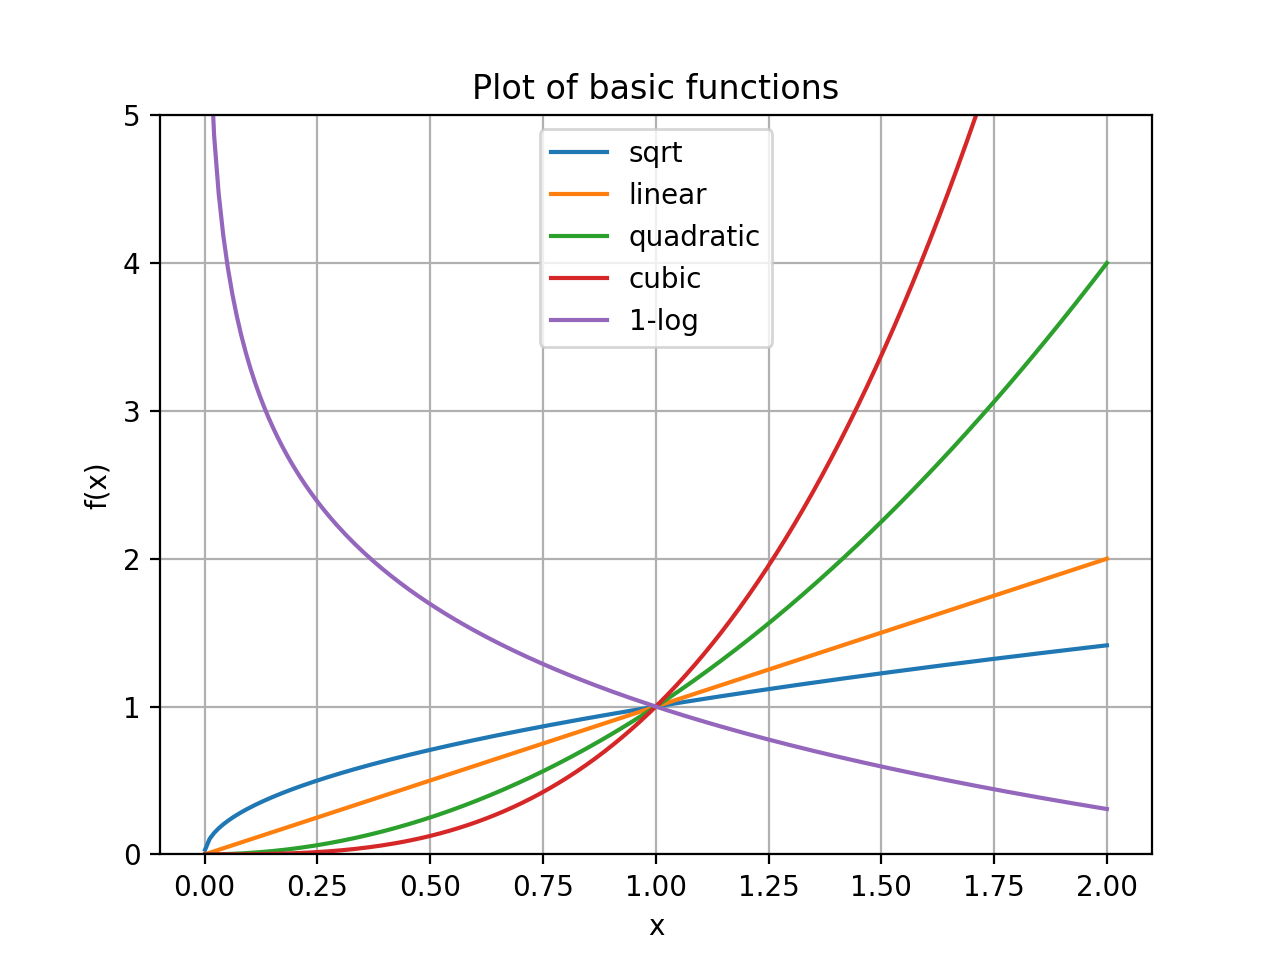

In [85]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import math

# try reducing the sampling to 10
x = np.linspace(0.001, 2, 200)

plt.xlabel('x')
plt.ylabel('f(x)')

plt.title("Plot of basic functions")


plt.plot(x, np.sqrt(x), label='sqrt')
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.plot(x, 1-np.log(x), label='1-log')

plt.ylim(0., 5.)
plt.grid(True)
plt.legend()

plt.show()



# Animated plots with matplotlib
We are finally ready to complete the exercise of the moving body by animating the plot.

The main difference is that instead of a simple `plt.plot(...)` command, we need to interact with the elements forming a plot. To understand the internals of the plot object take a look at this [matplotlib FAQ](https://matplotlib.org/faq/usage_faq.html).

We use the simple version of the example with all values fixed and focus on the plotting part.

First we replace [`plt.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) with the two separate statements:

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
max height: 21.48 at x = 39.75


<IPython.core.display.Javascript object>


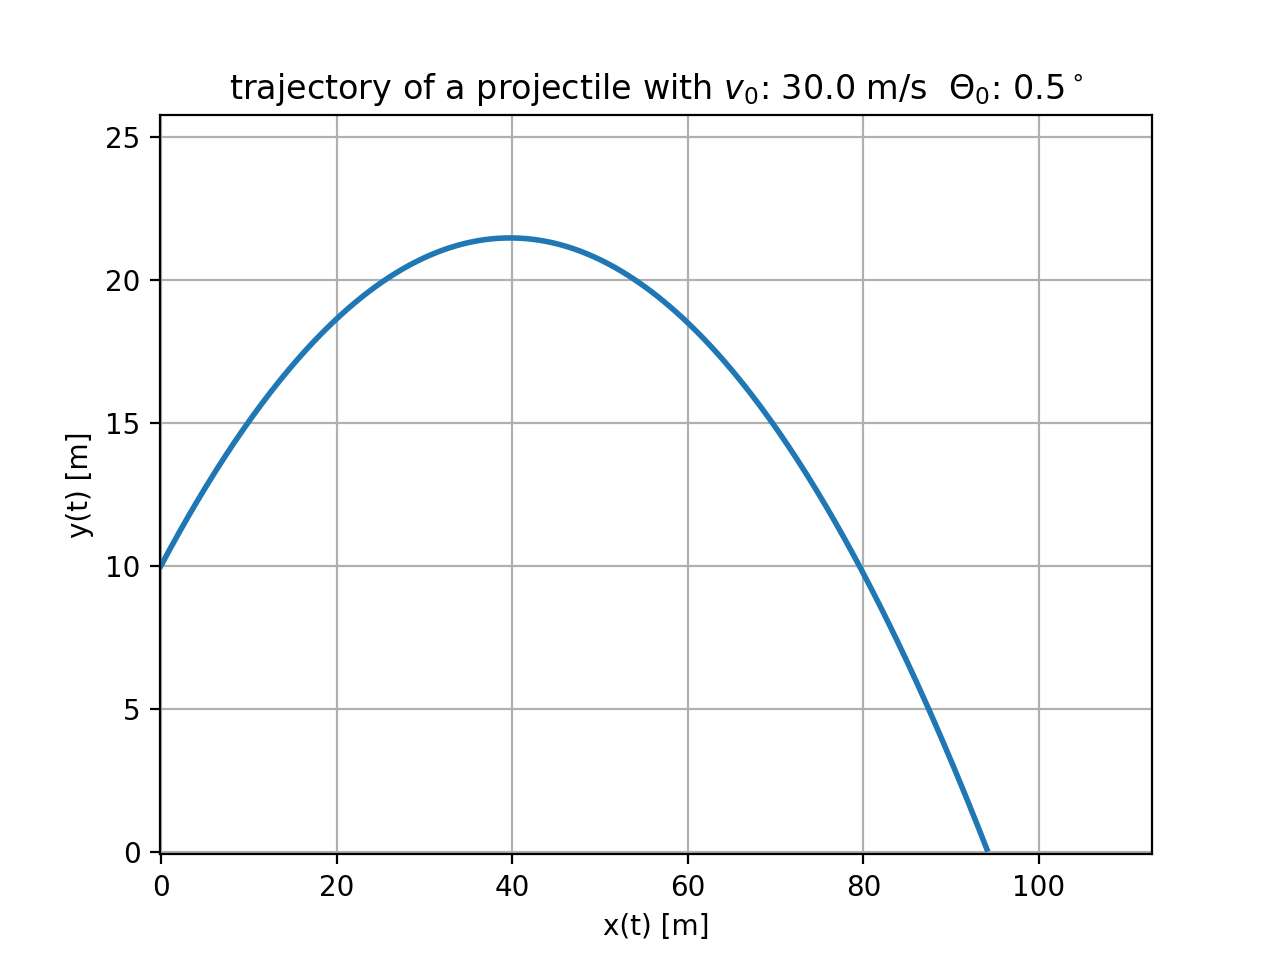

In [86]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time


# initial conditions
g = 9.8
h = 10.
theta = (30./180.)*np.pi
v0 = 30.
dt=0.01

#compute velocity components
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s"%(v0x,v0y))

x0 = 0
y0 = h

def x(t):
    return x0+v0x*t

def y(t):
    return y0+v0y*t-0.5*g*t*t


dt = 0.01
# generate list of times for sampling
times = np.arange(0., 1000., dt).tolist() 

#print first 10 elements
print(times[:10])

# compute x(t_i)
xi = [ x(t) for t in times if y(t)>=0.]

# compute y(t_i)
yi = [ y(t) for t in times if y(t)>=0. ]

# use 2D array to do one comprehension
pos = np.array([ [x(t),y(t)] for t in times if y(t)>=0. ])


print("max height: %.2f at x = %.2f"%(max(yi),xi[yi.index(max(yi))]))

# create a figure object
fig = plt.figure()

# add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(xi)*1.2), ylim=(-0.1,max(yi)*1.2) )
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))

# plot 
#line, = ax.plot(xi, yi, '--', lw=2)
line, = ax.plot(pos[:,0], pos[:,1],  lw=2)


plt.show()

Now we use the [`FuncAnimation`](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html) to animate the plot. The process consists in 3 steps
- plot the initial state of the plot. In our case we plot the initial positions `xi[0]` and `yi[0]`
- define a `animate` function that takes an argument and is called to update the info being displayed on the plot
- call the `FuncAnimation` function that updates the figure by calling `animate` a number of times
  - it has  a numnber of useful options such as whether to repeat the animation, change the frame rate, introduce a delay between repetitions

v0_x: 25.981 m/s 	 v0_y: 15.000 m/s
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
max height: 21.48 at x = 39.75


<IPython.core.display.Javascript object>


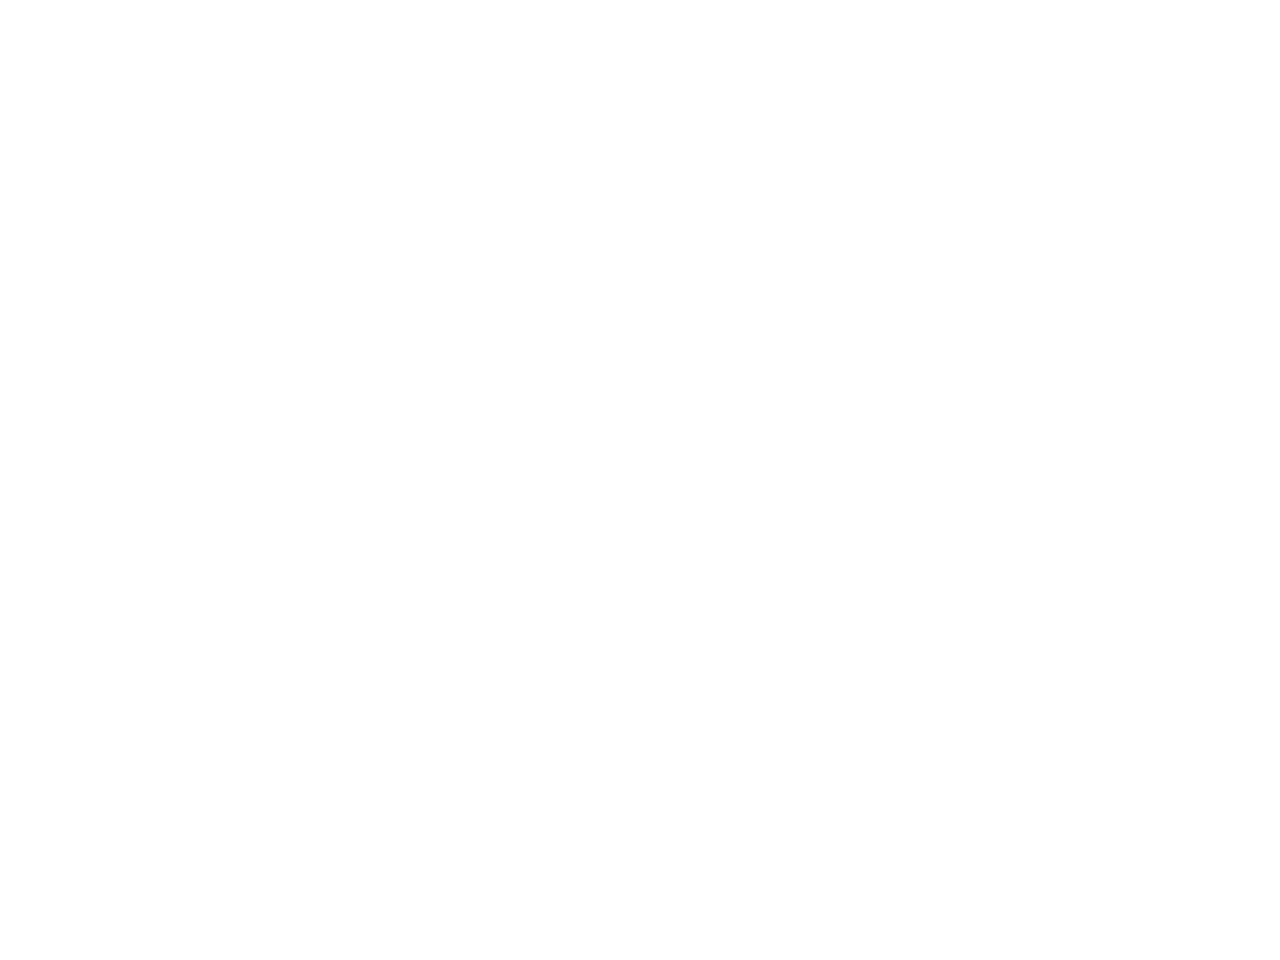

In [87]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time


# initial conditions
g = 9.8
h = 10.
theta = (30./180.)*np.pi
v0 = 30.
dt=0.01

#compute velocity components
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.3f m/s \t v0_y: %.3f m/s"%(v0x,v0y))

x0 = 0
y0 = h

def x(t):
    return x0+v0x*t

def y(t):
    return y0+v0y*t-0.5*g*t*t


dt = 0.01
# generate list of times for sampling
times = np.arange(0., 1000., dt).tolist() 

#print first 10 elements
print(times[:10])

# compute x(t_i)
xi = [ x(t) for t in times if y(t)>=0.]

# compute y(t_i)
yi = [ y(t) for t in times if y(t)>=0. ]

print("max height: %.2f at x = %.2f"%(max(yi),xi[yi.index(max(yi))]))



## simple old plot
#plt.plot(xi,yi)

# create a figure object
fig = plt.figure()

# add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(xi)*1.2), ylim=(-0.1,max(yi)*1.2) )
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))



# plot initial state of the plot
line, = ax.plot(xi[0], yi[0], 'o-', lw=2)


def animate(i):

    line.set_data(xi[i], yi[i])
    return line

#ani = animation.FuncAnimation(fig, animate, np.arange(1, len(xi)), interval=1, blit=True, repeat_delay=1000)
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(xi)), interval=1, blit=True, repeat=True)


plt.show()


If you would like to keep the trajectory in the figure, you simply have to specify to plot all the point up to ith position by using slicing. Change `xi[i]` to `xi[:i]`.

v0_x: 25.981 m/s 	 v0_y: 15.000 m/s
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
max height: 21.48 at x = 39.75


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


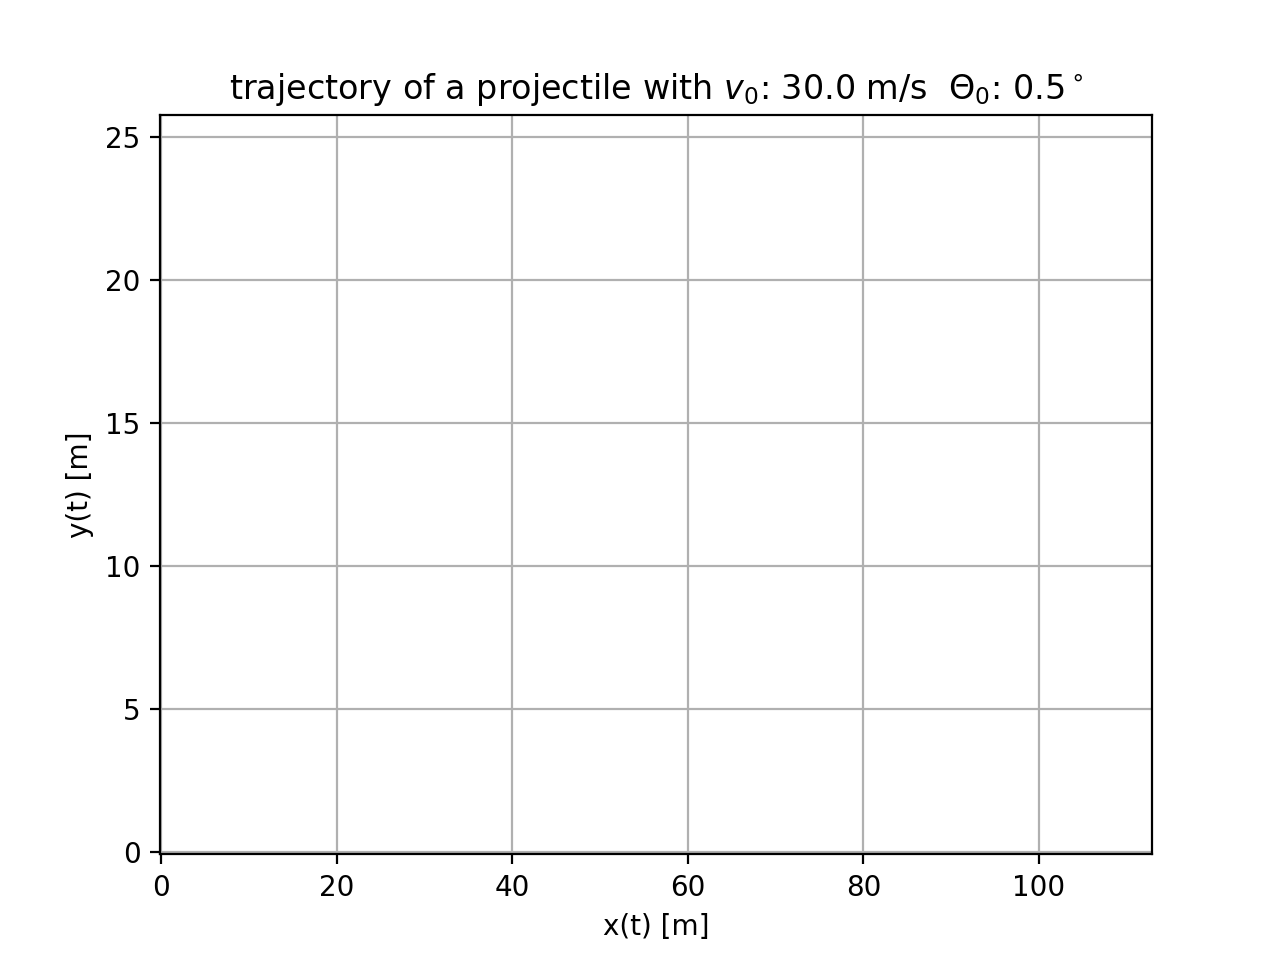

In [88]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time


# initial conditions
g = 9.8
h = 10.
theta = (30./180.)*np.pi
v0 = 30.
dt=0.01

#compute velocity components
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.3f m/s \t v0_y: %.3f m/s"%(v0x,v0y))

x0 = 0
y0 = h

def x(t):
    return x0+v0x*t

def y(t):
    return y0+v0y*t-0.5*g*t*t


dt = 0.01
# generate list of times for sampling
times = np.arange(0., 1000., dt).tolist() 

#print first 10 elements
print(times[:10])

# compute x(t_i)
xi = [ x(t) for t in times if y(t)>=0.]

# compute y(t_i)
yi = [ y(t) for t in times if y(t)>=0. ]

print("max height: %.2f at x = %.2f"%(max(yi),xi[yi.index(max(yi))]))


# create a figure object
fig = plt.figure()

# add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(xi)*1.2), ylim=(-0.1,max(yi)*1.2) )
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))



# plot initial state of the plot
line, = ax.plot(xi[0], yi[0], '--', lw=2)


def animate(i):

    line.set_data(xi[:i], yi[:i])
    return line

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(xi)), interval=1, blit=True, repeat=True, repeat_delay=500)
#ani = animation.FuncAnimation(fig, animate, np.arange(1, len(xi)), interval=1, blit=True, repeat=False)


plt.show()


## adding legend and info
Finally we add some useful info on the plot to report the time and the position.

We do this by defining a template text for what we want to show and its format. The actual data is updated in animate as with the positions.

v0_x: 25.981 m/s 	 v0_y: 15.000 m/s
max height: 21.48 at x = 39.75


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


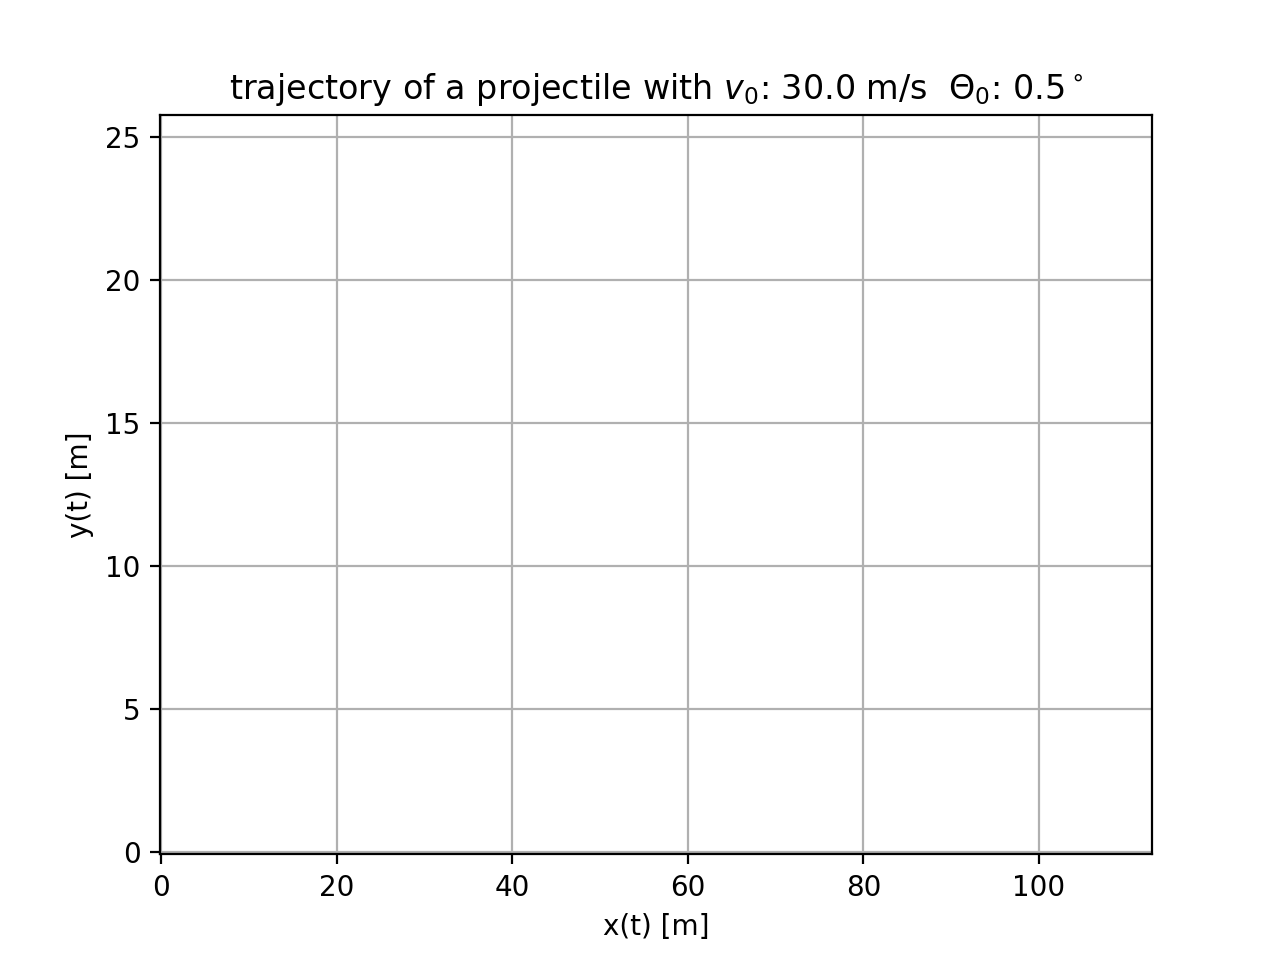

In [89]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time


# initial conditions
g = 9.8
h = 10.
theta = (30./180.)*np.pi
v0 = 30.
dt=0.01

#compute velocity components
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.3f m/s \t v0_y: %.3f m/s"%(v0x,v0y))

x0 = 0
y0 = h

def x(t):
    return x0+v0x*t

def y(t):
    return y0+v0y*t-0.5*g*t*t


dt = 0.01
# generate list of times for sampling
times = np.arange(0., 1000., dt).tolist() 

# compute x(t_i)
xi = [ x(t) for t in times if y(t)>=0.]

# compute y(t_i)
yi = [ y(t) for t in times if y(t)>=0. ]

print("max height: %.2f at x = %.2f"%(max(yi),xi[yi.index(max(yi))]))


# create a figure object
fig = plt.figure()

# add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(xi)*1.2), ylim=(-0.1,max(yi)*1.2) )
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))



# plot initial plot
line, = ax.plot(xi[0], yi[0], lw=2)

# define a template info box to be shown
info_template = 'time = %.1fs  x: %.2fm   y: %.3fm'
info_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)


def animate(i):

    line.set_data(xi[:i], yi[:i])
    info_text.set_text(info_template % (times[i], xi[i],yi[i]))
    return line, info_text

#ani = animation.FuncAnimation(fig, animate, np.arange(1, len(xi)), interval=1, blit=True, repeat_delay=1000)
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(xi)), interval=1, blit=True, repeat=False)


plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))
plt.show()


## Exercise
- easy 
  - write position x of the max height and put an arrow pointing to the apex
  - write the value of x and y on the plot near the actual position in real time
  - add a slider to modify the value of some parameters interactively
- medium difficulty
  - write the solar system exercise with 2 simple bodies in python and use the animated plot to show the orbits of the bodies
  - create an animated histogram for a Gaussian distribution
  
## Additional material
- Take a look at this very nice example of the animation of a [double pendulum](https://matplotlib.org/gallery/animation/double_pendulum_sgskip.html)
  - download the notebook and run it yourself
  - note how it uses the integration methods from the [scipy](https://docs.scipy.org/doc/scipy/reference/index.html) package to integrate the equations of motion
    - try using the same methods to resolve the equation of motion for the rotation of the earth around the sun

## Using NumPy ndarray instead of Lists
We now solve the same problem  of the projectile but this time using a 2D array to do just one comprhension to compute both x(t) and y(t).

When plotting you have to use slicing to specify that the 1st column are the x values and the 2nd column are the y values.

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
(363, 2)


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


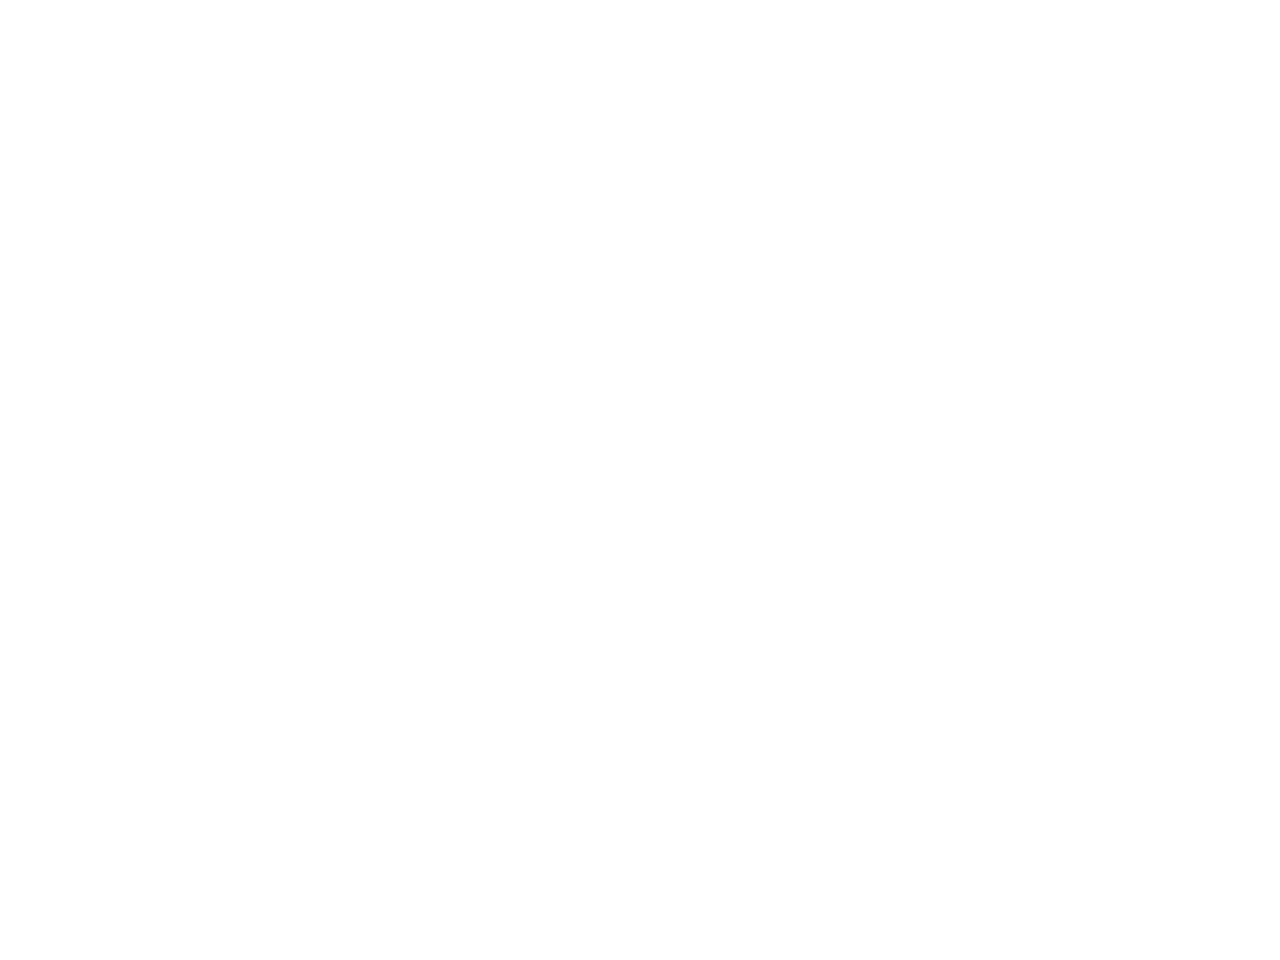

max height: 21.48 at x = 39.75


In [90]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time


# initial conditions
g = 9.8
h = 10.
theta = (30./180.)*np.pi
v0 = 30.
dt=0.01

#compute velocity components
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s"%(v0x,v0y))

x0 = 0
y0 = h

def x(t):
    return x0+v0x*t

def y(t):
    return y0+v0y*t-0.5*g*t*t


dt = 0.01
# generate list of times for sampling
times = np.arange(0., 1000., dt).tolist() 

#print first 10 elements
print(times[:10])

# use 2D array to do one comprehension
pos = np.array([ [x(t),y(t)] for t in times if y(t)>=0. ])
print(pos.shape)
# create a figure object
fig = plt.figure()

# add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(pos[:,0])*1.2), ylim=(-0.1,max(pos[:,1])*1.2) )
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))

# plot slices for ndarray
line, = ax.plot(pos[:,0], pos[:,1],  lw=2, color='red')
plt.show()

xi = list(pos[:,0])
yi = list(pos[:,1])
print("max height: %.2f at x = %.2f"%(max(yi),xi[yi.index(max(yi))]))


## using function with multiple return value
we now get rid of x(t) and y(t) and replace it with just one function pos(t) returning 2 values

We use ndarray everywhere instaed of the list type. Howevere note that
- to print the position of the maximum, using slices can cause some headache and confusion for who reads the code
  - you can create lists xi and yi to make the code more readable
- a slice does not have the same methods of a list. So for example you can not call `index()` on a slice so we create a list on the fly `list(pos[:,1]).index(max(pos[:,1]))`

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
(363, 2)
max height: 21.48 at x = 39.75


<IPython.core.display.Javascript object>


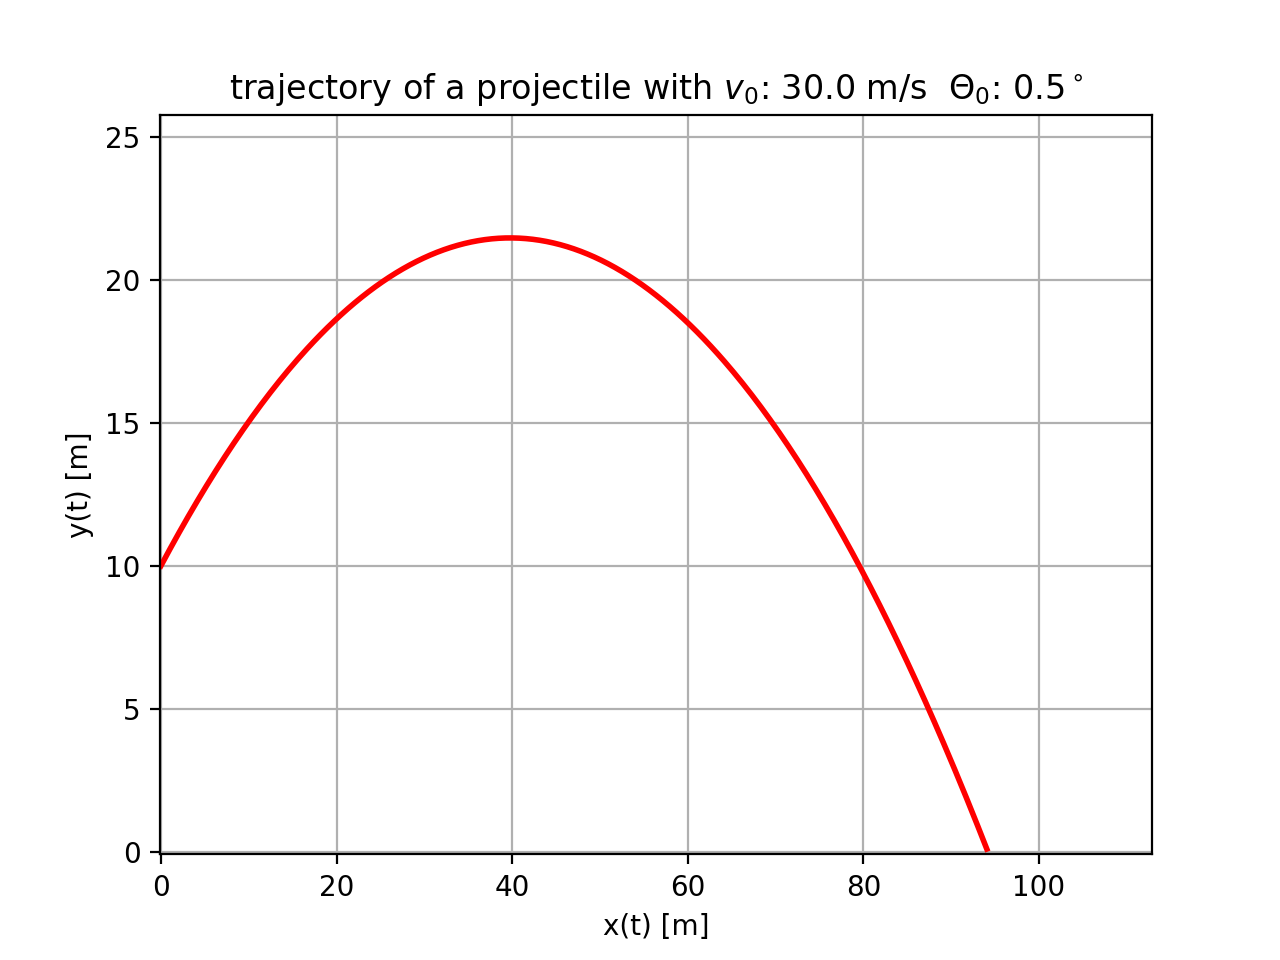

In [91]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import time


# initial conditions
g = 9.8
h = 10.
theta = (30./180.)*np.pi
v0 = 30.
dt=0.01

#compute velocity components
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s"%(v0x,v0y))

x0 = 0
y0 = h

def pos(t):
    return x0+v0x*t, y0+v0y*t-0.5*g*t*t


dt = 0.01
# generate list of times for sampling
times = np.arange(0., 1000., dt).tolist() 

#print first 10 elements
print(times[:10])


# use 2D array to do one comprehension
pos = np.array([ pos(t) for t in times if pos(t)[1]>=0. ])

print(pos.shape)

# you can create list for xi and yi
#xi = list(pos[:,0])
#yi = list(pos[:,1])
#print("max height: %.2f at x = %.2f"%(max(yi),xi[yi.index(max(yi))]))

# or you can simply use the slicing again. In this case it can be a bit confusing
# also note that index() is a method for a list not for slices.
print("max height: %.2f at x = %.2f"%(max(pos[:,1]),pos[ list(pos[:,1]).index(max(pos[:,1])),0 ] ) )



# create a figure object
fig = plt.figure()

# add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(pos[:,0])*1.2), ylim=(-0.1,max(pos[:,1])*1.2) )
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$"%(v0,theta))

# plot slices for ndarray
line, = ax.plot(pos[:,0], pos[:,1],  lw=2, color='red')

plt.show()

## Exercise
- exetend the problem to 3D and use 3D plot to show the trajectory in space